<a href="https://colab.research.google.com/github/Dwagh14/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

## <b> Problem Description </b>
In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

## <b> Data Description </b>


*   Battery_power - Total energy a battery can store in one time measured in mAh
*   Blue - Has bluetooth or not
*   Clock_speed - speed at which microprocessor executes instructions
*   Dual_sim - Has dual sim support or not
*   Fc - Front Camera mega pixels
*   Four_g - Has 4G or not
*   Int_memory - Internal Memory in Gigabytes
*   M_dep - Mobile Depth in cm
*   Mobile_wt - Weight of mobile phone
*   N_cores - Number of cores of processor
*   Pc - Primary Camera mega pixels
*   Px_height - Pixel Resolution Height
*   Px_width - Pixel Resolution Width
*   Ram - Random Access Memory in Mega Bytes
*   Sc_h - Screen Height of mobile in cm
*   Sc_w - Screen Width of mobile in cm
*   Talk_time - longest time that a single battery charge will last when you are
*   Three_g - Has 3G or not
*   Touch_screen - Has touch screen or not
*   Wifi - Has wifi or not
*   Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Supervised ML Classification-Mobile Price Range/data_mobile_price_range.csv')

# Data Cleaning

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* Minimum values of px_height and sc_w can not be zero, so replacing zero with mean values

In [ ]:
print(len(df[df.sc_w==0]))
print(len(df[df.px_height==0]))

180
2


In [ ]:
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
print(len(df[df.sc_w==0]))
print(len(df[df.px_height==0]))

0
0


In [ ]:
len(df[df.duplicated()])

0

# **Exploratory Data Analysis**

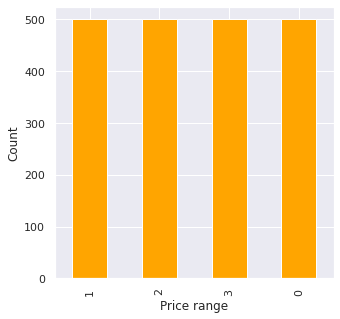

In [ ]:
sns.set()
price_plot = df['price_range'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.show()

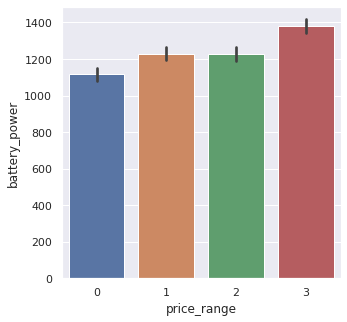

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.barplot(x='price_range', y='battery_power', data=df)
plt.show()

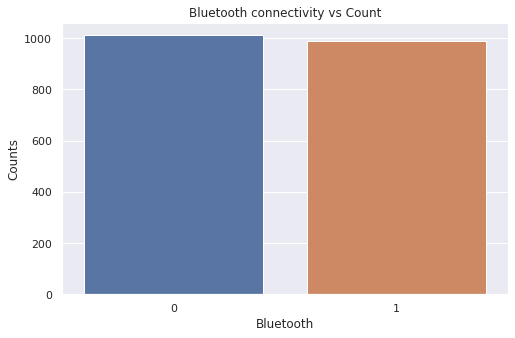

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
x = df['blue']
y = df['blue'].value_counts()
sns.barplot(x, y, ax=ax)
plt.xlabel('Bluetooth')
plt.ylabel('Counts')
plt.title('Bluetooth connectivity vs Count')
plt.show()

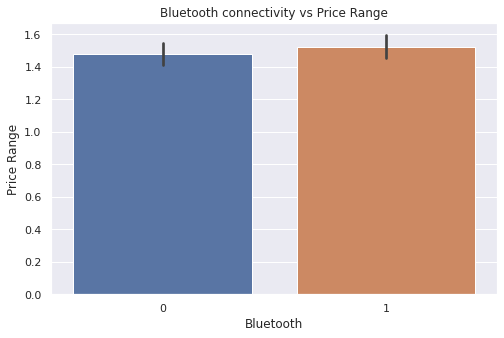

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
x = df['blue']
y = df['price_range']
sns.barplot(x, y, ax=ax)
plt.xlabel('Bluetooth')
plt.ylabel('Price Range')
plt.title('Bluetooth connectivity vs Price Range')
plt.show()

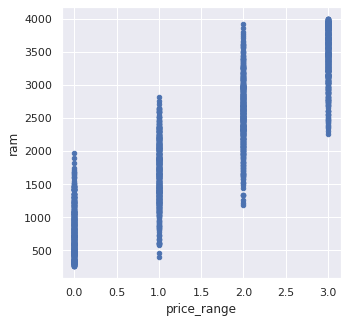

In [ ]:
df.plot(x = 'price_range', y = 'ram', kind = 'scatter')
plt.show()

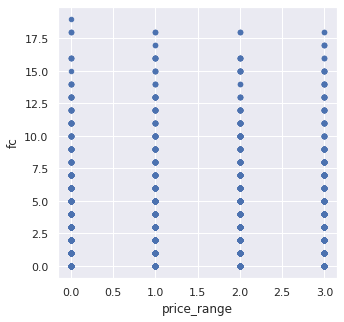

In [ ]:
df.plot(x = 'price_range', y = 'fc', kind = 'scatter')
plt.show()

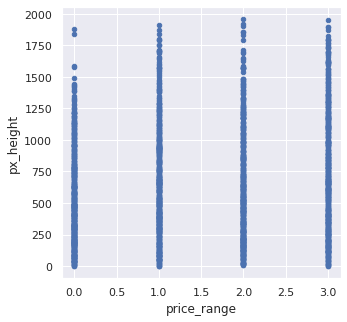

In [ ]:
df.plot(x = 'price_range', y = 'px_height', kind = 'scatter')
plt.show()

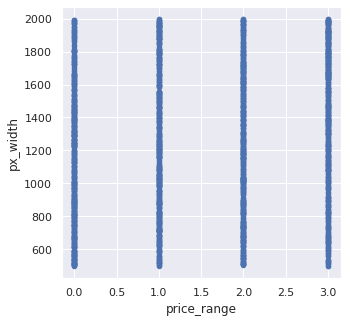

In [ ]:
df.plot(x = 'price_range', y = 'px_width', kind = 'scatter')
plt.show()

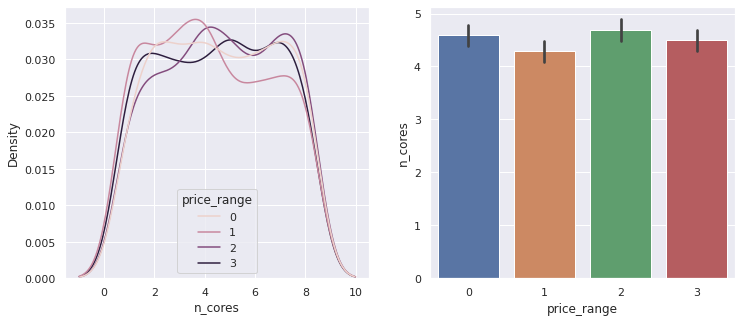

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data = df, x = 'n_cores', hue = 'price_range', ax=axs[0])
sns.barplot(data = df, x= 'price_range', y = 'n_cores', ax=axs[1])
plt.show()


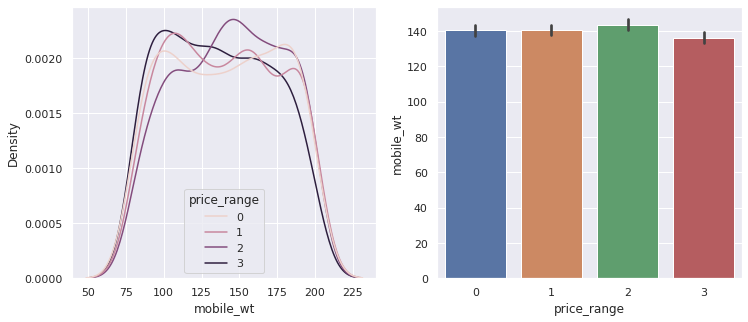

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data = df, x = 'mobile_wt', hue = 'price_range', ax=axs[0])
sns.barplot(data = df, x= 'price_range', y = 'mobile_wt', ax=axs[1])
plt.show()

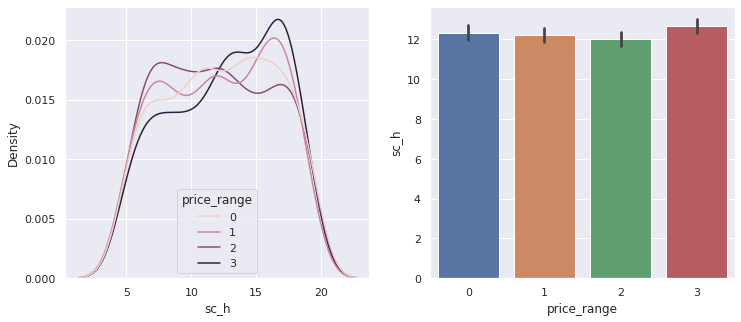

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(data = df, x = 'sc_h', hue = 'price_range', ax=axs[0])
sns.barplot(data = df, x= 'price_range', y = 'sc_h', ax=axs[1])
plt.show()

In [ ]:
connectivity_features = ['four_g', 'three_g']

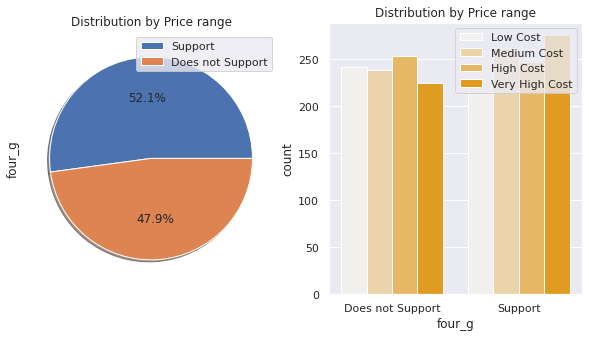

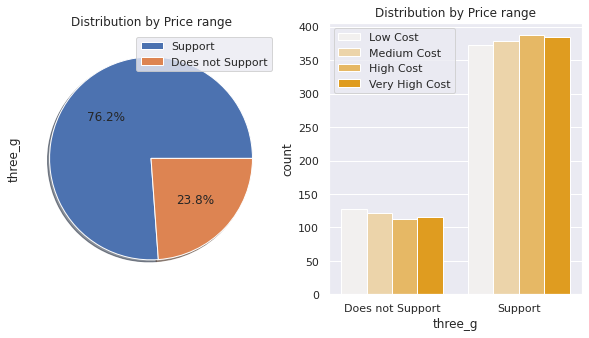

In [ ]:
for col in connectivity_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,5))

  df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by Price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue='price_range', data=df, ax=ax2, color='orange')
  ax2.set_title('Distribution by Price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

# Checking the Disctribution of all Independent Variables

In [ ]:
n_features = df.describe().columns
n_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

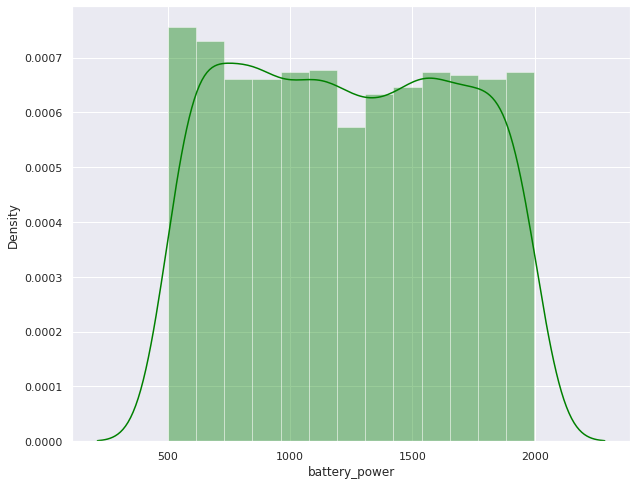

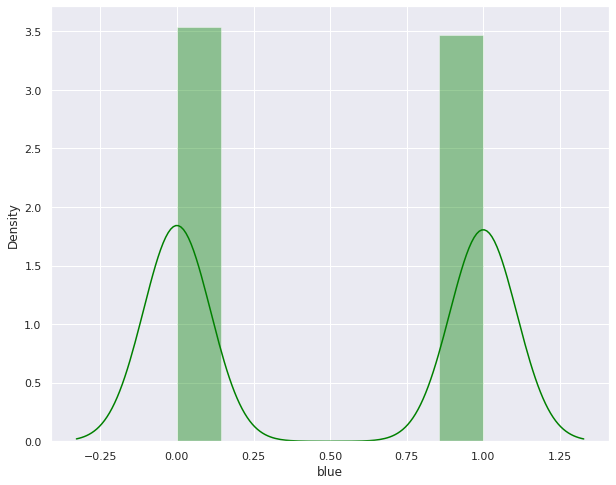

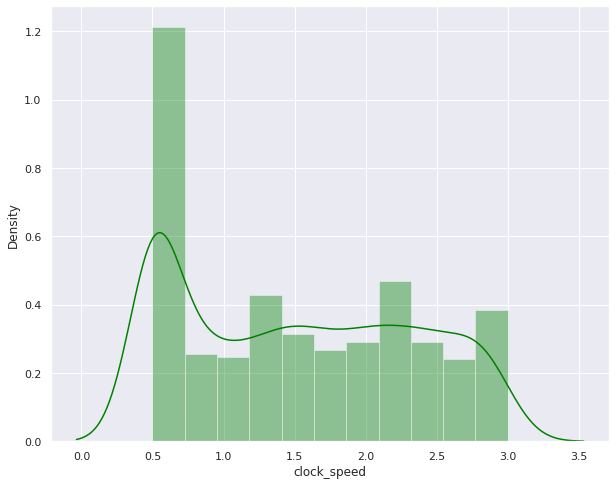

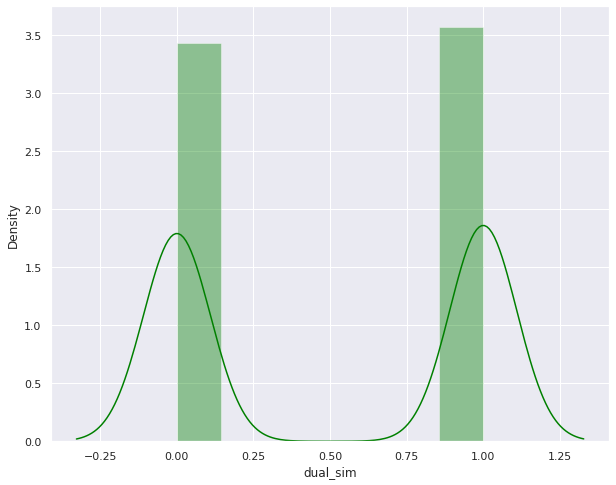

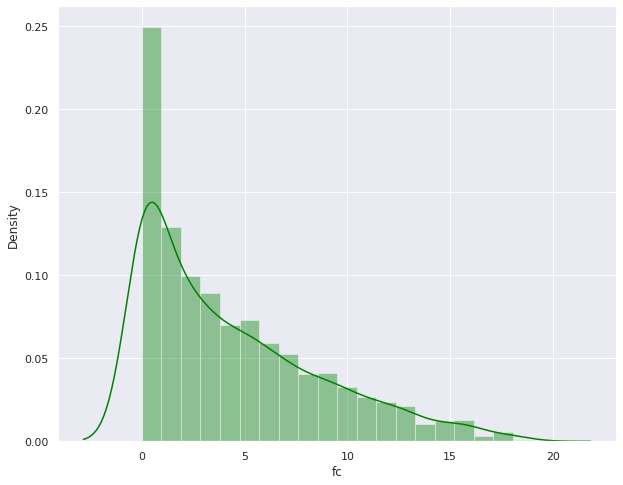

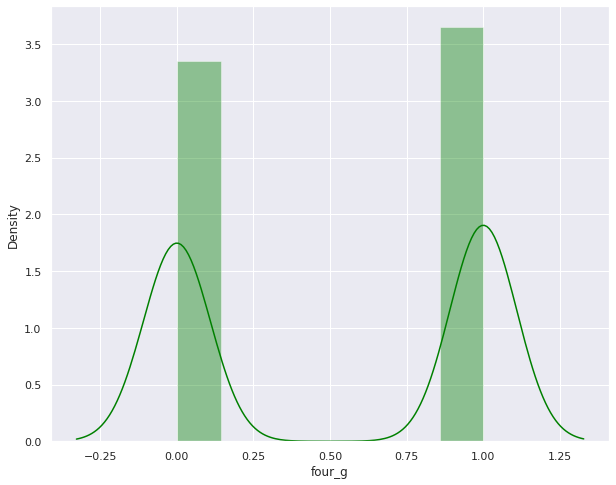

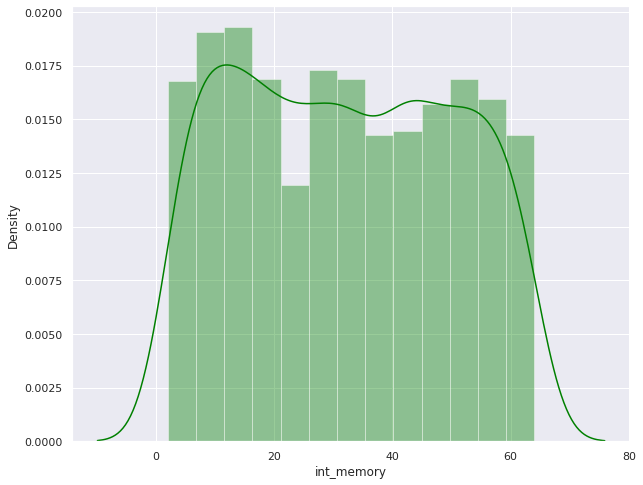

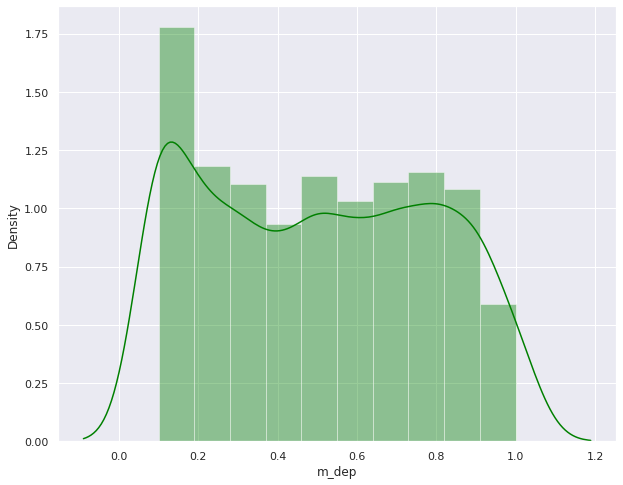

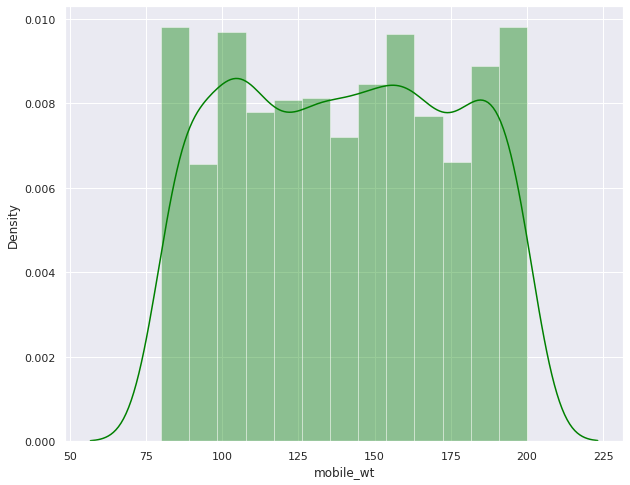

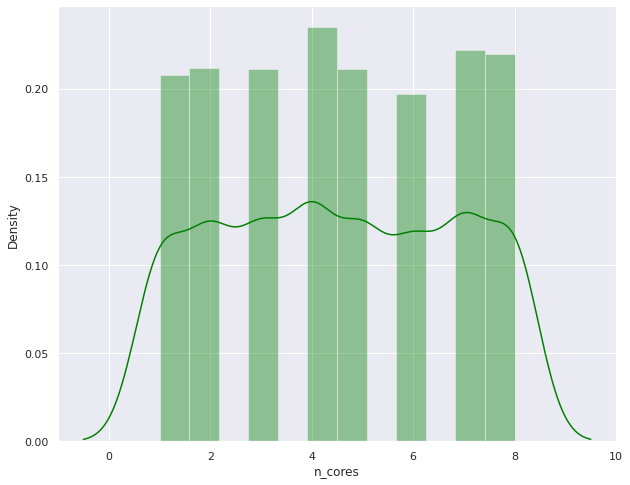

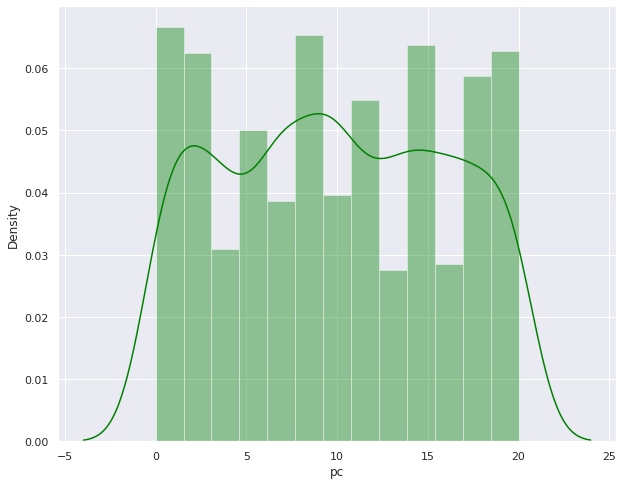

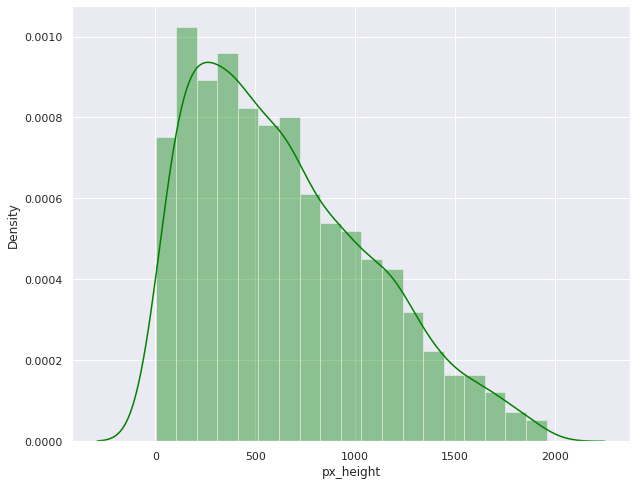

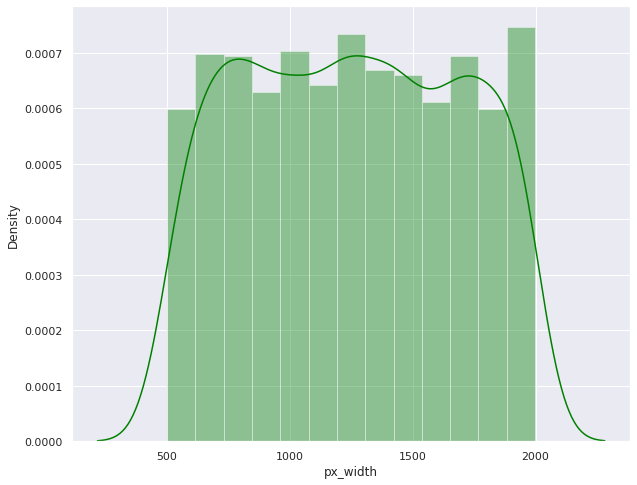

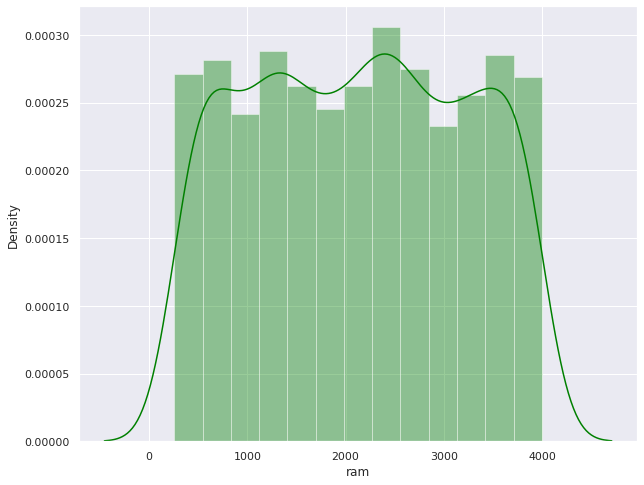

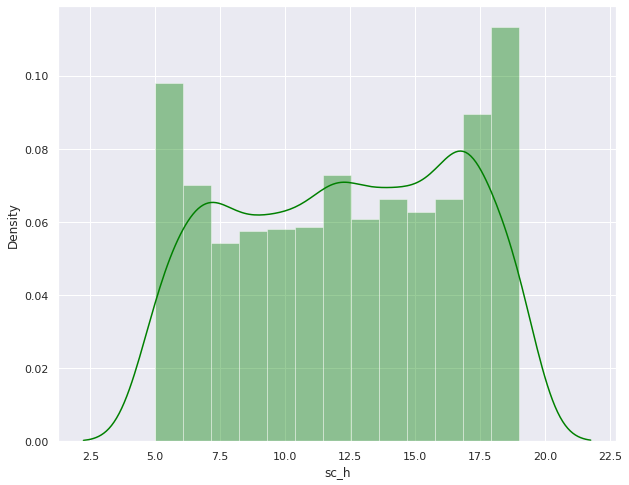

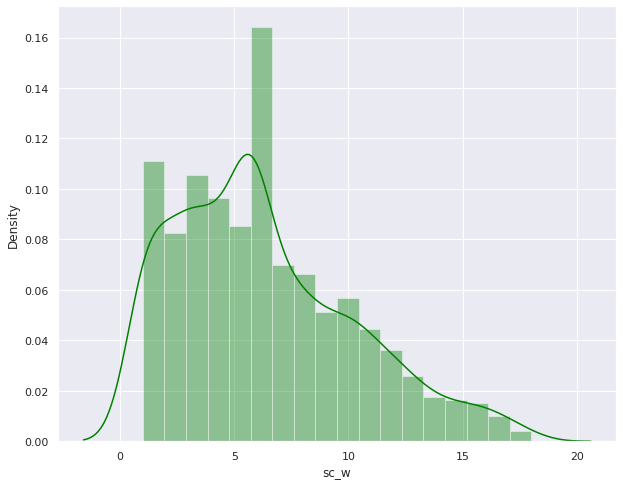

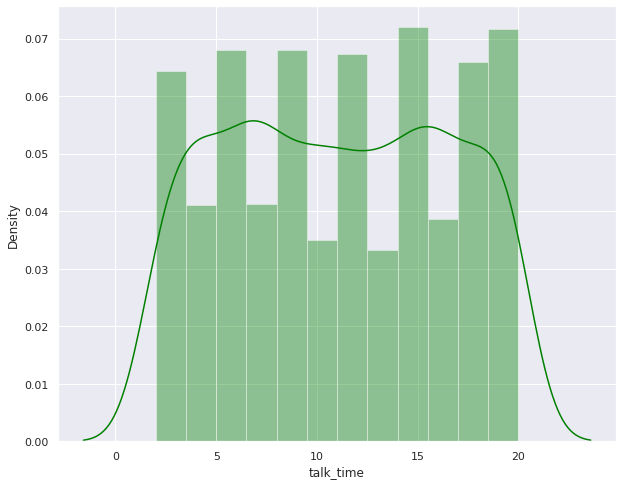

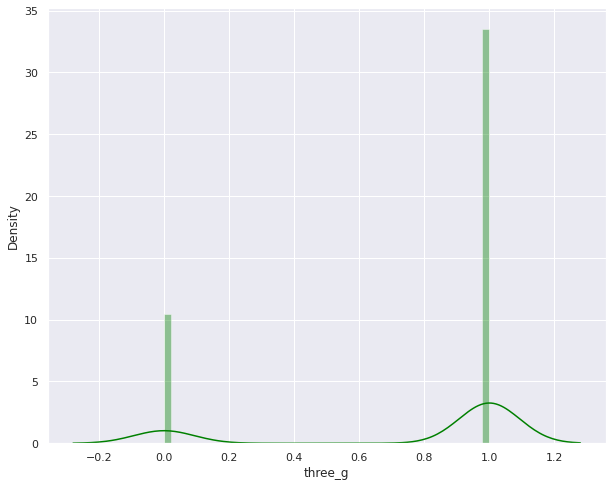

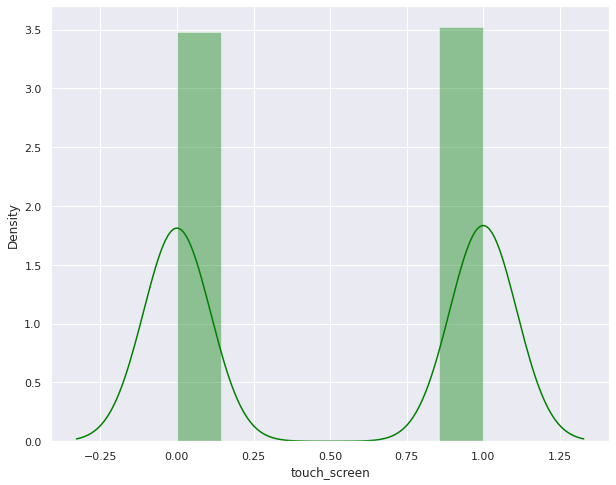

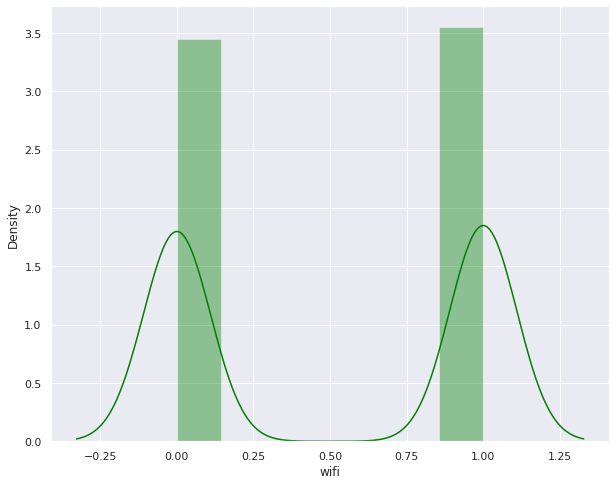

In [ ]:
for col in n_features[0:20]:
  plt.figure(figsize = (10,8))
  sns.distplot(df[col], color = 'green')
  plt.show()

# Tranformation of Independent Variables

In [ ]:
features_1 = ['m_dep', 'fc', 'px_height', 'sc_w']

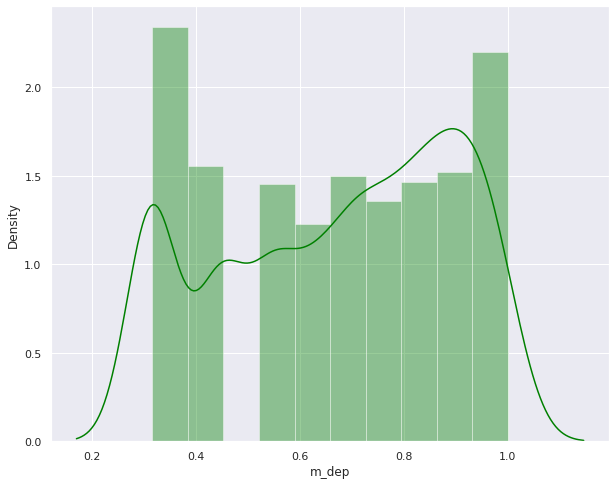

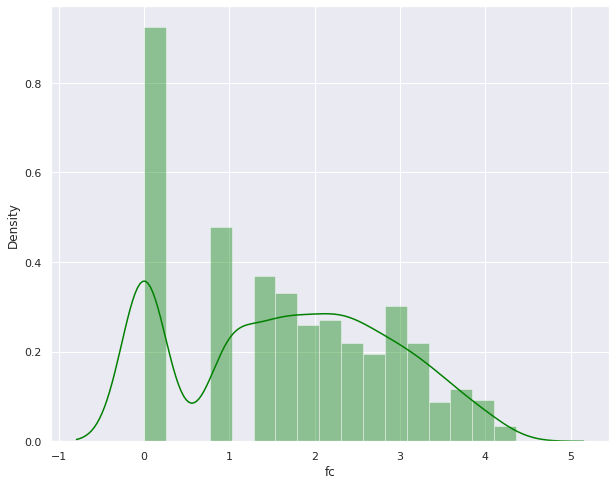

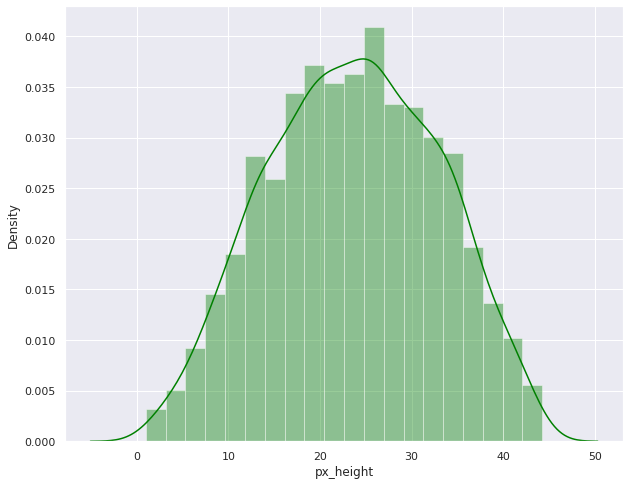

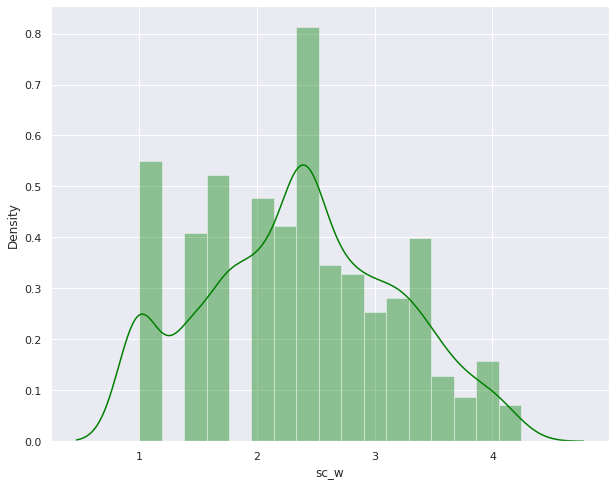

In [ ]:
for col in features_1:
  plt.figure(figsize = (10,8))
  sns.distplot(np.sqrt(df[col]), color = 'green')
  plt.show()

## Checking For Multi-collinearity

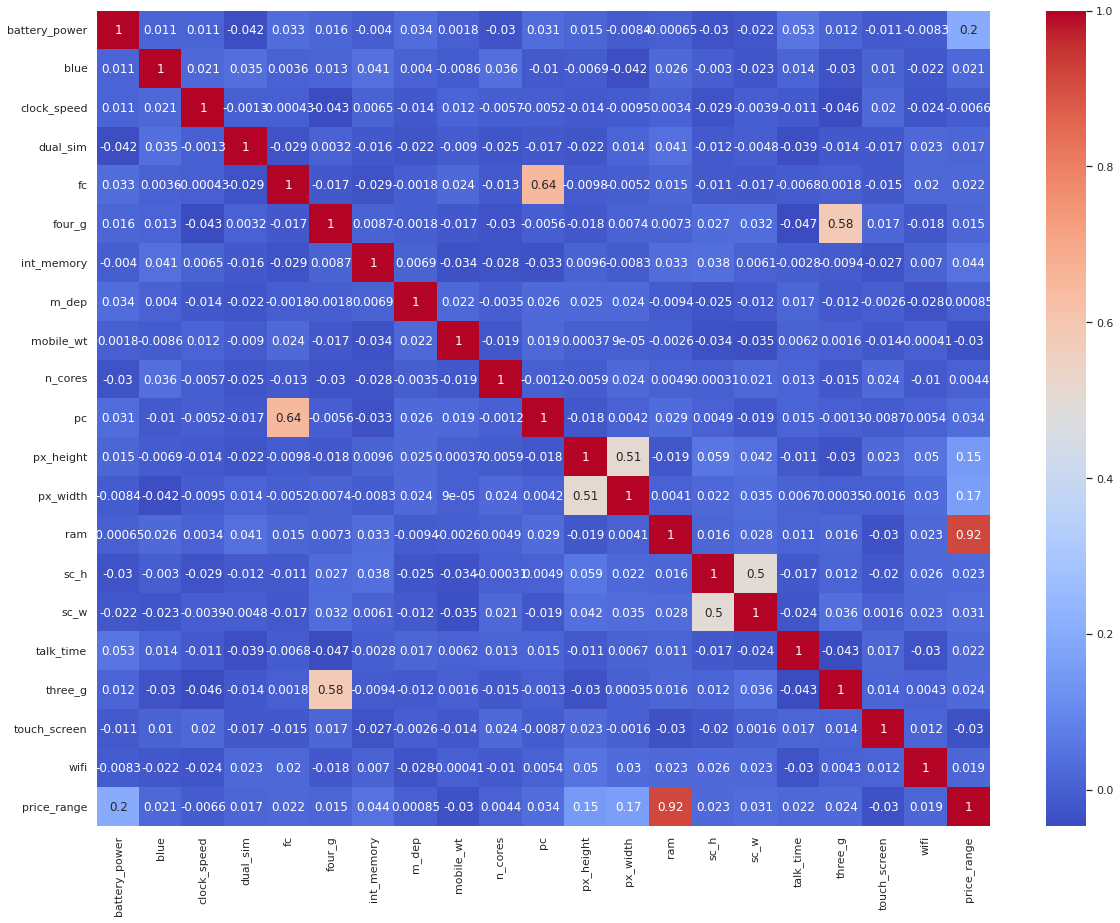

In [ ]:
correlation = df.corr()
plt.figure(figsize = [20,15])
sns.heatmap(correlation, cmap = 'coolwarm', annot=True)


* From above correlation plot we can see that, Ram and price_range shows high correlation which is good sign, it signifies that RAM will play major deciding factor in estimating the price range.
* There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlation are justified since there are good chances that if front camera of phone is good, the back camera would also be good.



# Looking for Outliers

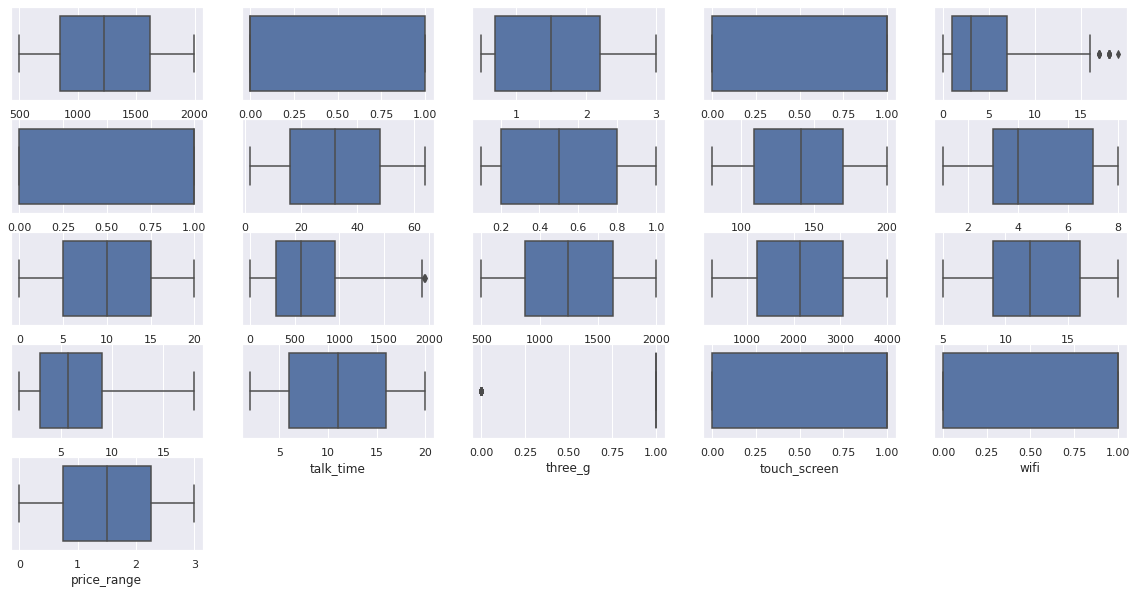

In [ ]:
plt.figure(figsize = (20,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()]):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

## **# Implementation of ML Classification Algorithms**

# Splitting data into train and test

In [ ]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

In [ ]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
print(x.shape, y.shape)

(2000, 20) (2000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.20, random_state = 42)

In [ ]:
print(x_train.shape, y_train.shape)

(1600, 20) (1600,)


## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(log_pred,y_test))

[[105   1   0   0]
 [  0  86   9   0]
 [  0   4  77   3]
 [  0   0   6 109]]


In [ ]:
print(classification_report(log_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
print(accuracy_score(y_test,log_pred))

0.9425


## Hyper parameter Tuning on Logistic Regression Model

In [ ]:
lr2 = LogisticRegression(solver='newton-cg')
lr2.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
log_pred2 = lr2.predict(x_test)

In [ ]:
confusion_matrix(log_pred2,y_test)

array([[105,   1,   0,   0],
       [  0,  86,   9,   0],
       [  0,   4,  77,   3],
       [  0,   0,   6, 109]])

In [ ]:
print(classification_report(log_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
accuracy_score(y_test,log_pred2)

0.9425

# 2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
ran_pred = classifier.predict(x_test)

In [ ]:
confusion_matrix(ran_pred,y_test)

array([[100,   7,   0,   0],
       [  5,  76,   7,   0],
       [  0,   8,  79,  13],
       [  0,   0,   6,  99]])

In [ ]:
print(accuracy_score(ran_pred,y_test))

0.885


In [ ]:
print(classification_report(ran_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.84      0.86      0.85        88
           2       0.86      0.79      0.82       100
           3       0.88      0.94      0.91       105

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400



## Hyper Parameter Tuning on Random Forest Model

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,60,80,100,200,300],
          'max_depth':[10,20,30,40],
          'max_leaf_nodes':[10,20,40] 
          } 
gsv = GridSearchCV(classifier, param_grid = params, scoring = 'accuracy', cv = 5)

In [ ]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_leaf_nodes': [10, 20, 40],
                         'n_estimators': [10, 50, 60, 80, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(gsv.best_params_)

{'max_depth': 20, 'max_leaf_nodes': 40, 'n_estimators': 200}


In [ ]:
print(gsv.best_score_)

0.8550000000000001


In [ ]:
ran_pred2 = gsv.predict(x_test)

In [ ]:
confusion_matrix(ran_pred2,y_test)

array([[101,   7,   0,   0],
       [  4,  77,  12,   0],
       [  0,   7,  73,  12],
       [  0,   0,   7, 100]])

In [ ]:
accuracy_score(ran_pred2,y_test)

0.8775

In [ ]:
print(classification_report(ran_pred2,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.85      0.83      0.84        93
           2       0.79      0.79      0.79        92
           3       0.89      0.93      0.91       107

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



* Plot the Variable Importance

In [ ]:
feature_importance = pd.DataFrame({'feature':x.columns, 'Score':classifier.feature_importances_}).sort_values(by='Score', ascending = False).reset_index(drop=True)

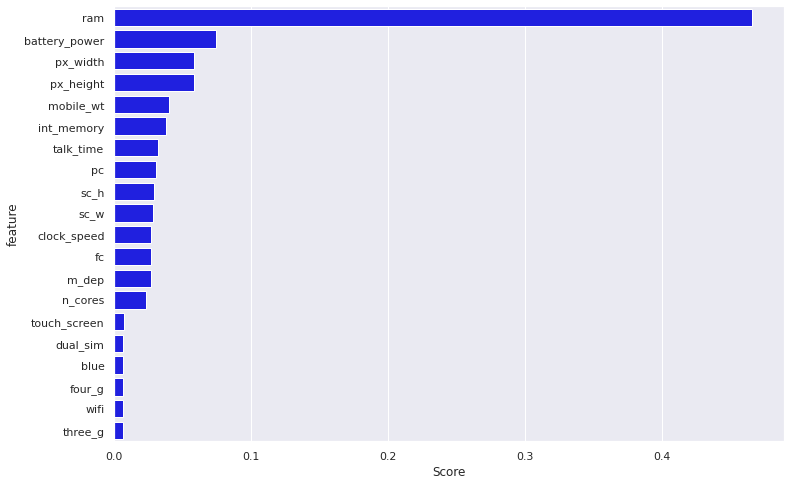

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['feature'], color='blue')
plt.show()

# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(x_test)

In [ ]:
confusion_matrix(dtc_pred,y_test)

array([[ 90,   6,   0,   0],
       [ 15,  80,  13,   0],
       [  0,   5,  63,  12],
       [  0,   0,  16, 100]])

In [ ]:
accuracy_score(dtc_pred,y_test)

0.8325

In [ ]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        96
           1       0.88      0.74      0.80       108
           2       0.68      0.79      0.73        80
           3       0.89      0.86      0.88       116

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



## Hyper Parameter Tuning on Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5,30), 'max_leaf_nodes':(10,100)}, scoring = 'accuracy', cv=5, verbose=24)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
dtc_pred2 = grid.predict(x_test)

In [ ]:
confusion_matrix(dtc_pred2,y_test)

array([[ 89,   6,   0,   0],
       [ 16,  76,  14,   0],
       [  0,   9,  64,  12],
       [  0,   0,  14, 100]])

In [ ]:
accuracy_score(dtc_pred2,y_test)

0.8225

In [ ]:
print(classification_report(dtc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        95
           1       0.84      0.72      0.77       106
           2       0.70      0.75      0.72        85
           3       0.89      0.88      0.88       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



* Plot the Variable importance

In [ ]:
feature_importance = pd.DataFrame({'feature':x.columns, 'Score':dtc.feature_importances_}).sort_values(by='Score', ascending = False).reset_index(drop=True)

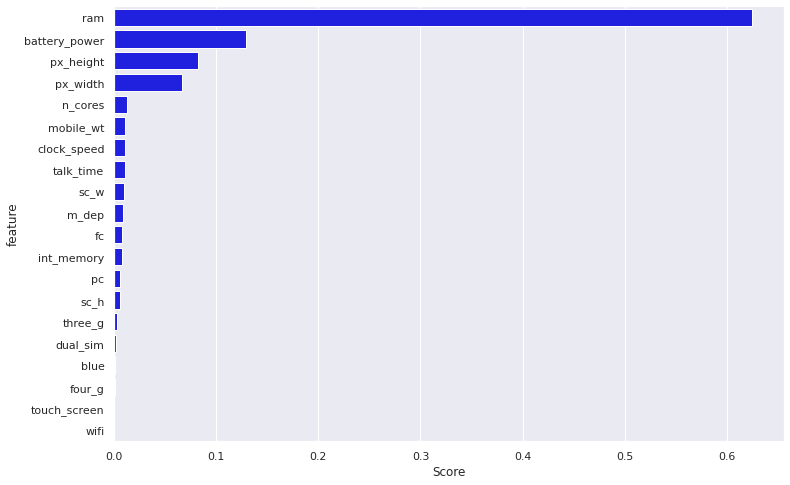

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['feature'], color='blue')
plt.show()

# 4. Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svmachine = SVC()
svmachine.fit(x_train,y_train)

SVC()

In [ ]:
svm_predict = svmachine.predict(x_test)

In [ ]:
confusion_matrix(svm_predict,y_test)

array([[100,   5,   0,   0],
       [  5,  80,  13,   0],
       [  0,   6,  72,  17],
       [  0,   0,   7,  95]])

In [ ]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.82      0.85        98
           2       0.78      0.76      0.77        95
           3       0.85      0.93      0.89       102

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
accuracy_score(svm_predict,y_test)

0.8675

#  Hyper Parameter Tuning on Support Vector Machine Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'gamma':[.1,.5,.25,1],
              'kernel':['rbf','poly','sigmoid','linear']}
GS = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [0.1, 0.5, 0.25, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
GS.best_score_

0.9306249999999998

In [ ]:
GS.best_params_

{'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
svm_predict_2 = GS.predict(x_test)

In [ ]:
confusion_matrix(svm_predict_2,y_test)

array([[103,   0,   0,   0],
       [  2,  91,   5,   0],
       [  0,   0,  83,   5],
       [  0,   0,   4, 107]])

In [ ]:
print(classification_report(svm_predict_2,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.93      0.96        98
           2       0.90      0.94      0.92        88
           3       0.96      0.96      0.96       111

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
accuracy_score(svm_predict_2,y_test)

0.96

# Comparing Accuracy Scores of all Models being used

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vescor Machines']
acc_scores = [0.9425, 0.8775, 0.8225, 0.96]

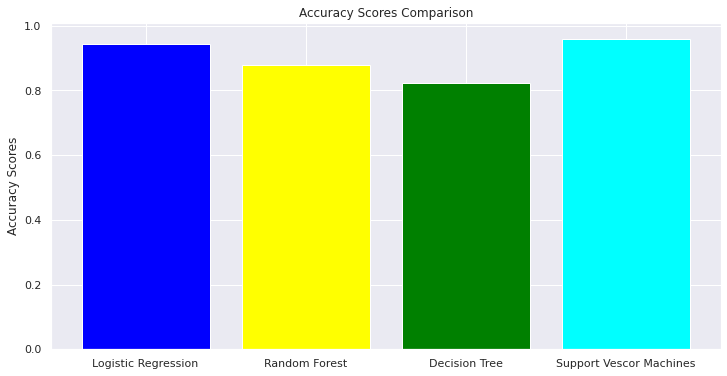

In [ ]:
plt.figure(figsize = (12,6))
plt.bar(models, acc_scores, color=['blue','yellow','green','cyan','red','violet'])
plt.title('Accuracy Scores Comparison')
plt.ylabel('Accuracy Scores')
plt.show()

* **Accuracy Scores:-**

Logistic Regression = 0.9425

Logistic Regression with Hyperparameter = 0.9425

Random Forest = 0.885

Random Forest WIth Hyperparameter= 0.8775

Decision Tree = 0.8325

Decision Tree with Hyperparameter = 0.8225

Support Vector Machines = 0.8675

Support Vestor Machine with hyperparameter = 0.96


# Conclusion :

1. From EDA we can see that there are mobile phones in 4 price ranges. The number of elements are almost same.
2. Half of devices have bluetooth connectivity and another half of devices doesn't have bluetooth connectivity.
3. There is gradual increase in battery power as the price increases.
4. Ram has continuous increase in price range while moving from low cost to vey high cost.
5. Costly phones are lighter in weight.
6. RAM, Battery power, pixels and connectivity features 'three_g' and 'four_g' plays more significant role in deciding the price range of mobile phones.
7. From above used classification models, we can conclude that Logistic Regression and SVM with using Hyperparameter tuning we can achieve best results.